In [29]:
pip install librosa

   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ------------------------------- -------- 204.8/260.1 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 260.1/260.1 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------ --------------------------- 0.3/1.0 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  1.0/1.0 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/166.7 kB ? eta -:--:--
   --------------------------------------- 166.7/166.7 kB 10.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
from PIL import Image

#### Import features csv dataset

In [ ]:

# base_data_path_3sec = "../../notebooks/hemant-gulati/data/"
# original_dataset_3sec = "features_3_sec.csv"
# base_data_path_30sec = "../../notebooks/hemant-gulati/data/"
# original_dataset_30sec = "features_30_sec.csv"
# original_data_path_3sec= base_data_path_3sec + original_dataset_3sec
# original_data_path_30sec= base_data_path_30sec + original_dataset_30sec

# print(original_data_path_3sec)
# print(original_data_path_30sec)


In [13]:
# df_3sec= pd.read_csv(original_data_path_3sec)
# df_30sec= pd.read_csv(original_data_path_30sec)

#### Identify missing values 

In [15]:
# missing_values_3sec= df_3sec.isnull().sum()
# missing_values_30sec= df_30sec.isnull().sum()

# print(missing_values_3sec[missing_values_3sec>0])
# print(missing_values_30sec[missing_values_30sec>0])


Series([], dtype: int64)
Series([], dtype: int64)


#### Identify duplicate values 

In [17]:
# duplicates_3sec = df_3sec.duplicated().sum()
# duplicates_30sec = df_30sec.duplicated().sum()

# print(f"Number of duplicate rows in 3sec dataset: {duplicates_3sec}")
# print(f"Number of duplicate rows in 30sec dataset: {duplicates_30sec}")

Number of duplicate rows in 3sec dataset: 0
Number of duplicate rows in 30sec dataset: 0


#### Inspect the dataset

In [20]:
# df_3sec.info()
# df_3sec.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [21]:
# df_30sec.info()
# df_30sec.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


#### Import audio files

In [3]:
#Path to audio files directory
audio_dir= "../../notebooks/hemant-gulati/data/genres_original"

#List all genre folders under audio directory
genres = os.listdir(audio_dir)
print("Genres:",genres)

#List all files under one sample genere: blues
print("Example files in Blues:", os.listdir(os.path.join(audio_dir, 'blues')))

Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Example files in Blues: ['blues.00000.wav', 'blues.00001.wav', 'blues.00002.wav', 'blues.00003.wav', 'blues.00004.wav', 'blues.00005.wav', 'blues.00006.wav', 'blues.00007.wav', 'blues.00008.wav', 'blues.00009.wav', 'blues.00010.wav', 'blues.00011.wav', 'blues.00012.wav', 'blues.00013.wav', 'blues.00014.wav', 'blues.00015.wav', 'blues.00016.wav', 'blues.00017.wav', 'blues.00018.wav', 'blues.00019.wav', 'blues.00020.wav', 'blues.00021.wav', 'blues.00022.wav', 'blues.00023.wav', 'blues.00024.wav', 'blues.00025.wav', 'blues.00026.wav', 'blues.00027.wav', 'blues.00028.wav', 'blues.00029.wav', 'blues.00030.wav', 'blues.00031.wav', 'blues.00032.wav', 'blues.00033.wav', 'blues.00034.wav', 'blues.00035.wav', 'blues.00036.wav', 'blues.00037.wav', 'blues.00038.wav', 'blues.00039.wav', 'blues.00040.wav', 'blues.00041.wav', 'blues.00042.wav', 'blues.00043.wav', 'blues.00044.wav', 'blues.00045.wav'

#### Verify audio file properties such as Audio spectrum and Sample rate

In [4]:
#Load sample audio file
sample_file= os.path.join(audio_dir, "blues","blues.00000.wav")
y,sr= librosa.load(sample_file) # y is the waveform,represents the audio time series data., and its length corresponds to the number of samples in the audio signal.It is a 1-dimensional NumPy array containing the amplitude values of the audio signal after it has been loaded. Each value corresponds to a sampled amplitude of the waveform.
                                # sr is the sampling rate, which determines the time resolution of the signal.

# Print details
print(f"Sample Rate:{sr}")
print(f"Audio Spectrum: {librosa.get_duration(y=y,sr=sr)} seconds")

Sample Rate:22050
Audio Spectrum: 30.013333333333332 seconds


In [5]:
print(sample_file)

../../notebooks/hemant-gulati/data/genres_original\blues\blues.00000.wav


#### Generate spectrogram from audio files

In [5]:
#Ouput folder for spectrogram
output_path_30secs = "../../notebooks/hemant-gulati/data/spectrogram"
os.makedirs(output_path_30secs, exist_ok=True) #If folder doesnot exist then create a new one

In [6]:
# Error log to keep track of problematic files
error_log = []

# Generate spectrograms for each genre
for genre in genres:
    genre_path = os.path.join(audio_dir, genre) #Combine audio path with genre
    print(genre_path)
    output_genre_path = os.path.join(output_path_30secs, genre) # Combine spectrogram path with genre
    print(output_genre_path)
    os.makedirs(output_genre_path, exist_ok=True)

    for file in os.listdir(genre_path): #Loop through wav files
        if file.endswith(".wav"): # Ensure it's a WAV file
            #Load audio file
            audio_file = os.path.join(genre_path, file) #Path to genre wav files
            output_file = os.path.join(output_genre_path, file.replace(".wav", ".png"))  # Target spectrogram file

            # Skip if spectrogram already exists to avoid any duplicate records
            if os.path.exists(output_file):
                print(f"Skipping already processed file: {audio_file}")
                continue

            try:
                y,sr= librosa.load(audio_file,duration=30) # Load first 30 secs,limits audio to ensure consistency

                #Create Mel Spectrogram
                mel_spectrogram = librosa.feature.melspectrogram(y=y,sr=sr) # Converts the audio waveform (y) into a Mel spectrogram
                mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max) # Converts the spectrogram to a decibel scale for better visualization
    
                # Display Spectrogram as image
                plt.figure(figsize=(10,4)) # set the image size
                librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel') # Displays the spectrogram as an image.
                plt.axis('off') # Remove axes for CNN compatibility (CNN doesn’t need them)
                plt.tight_layout() # Remove unnecessary padding
    
                # Save the spectrogram as image
                output_file = os.path.join(output_genre_path,file.replace("wav","png")) # Removes extra whitespace around the figure.
                plt.savefig(output_file, bbox_inches="tight", pad_inches=0) # 
                plt.close()

            except Exception as e:
                #Log errors and skip corrupted files
                print(f"Error processing file {audio_file}:{e}")
                error_log.append({"file":audio_file,"error":str(e)})
                continue #Skip to the next file

#Save error log to a file
if error_log:
    error_log_path= os.path.join(output_path_30secs,"error_log.txt")
    with open(error_log_path, "w") as f:
        for entry in error_log:
            f.write(f"File: {entry['file']}, Error: {entry['error']}\n")
    print("Spectrogram generation completed with errors and  saved to:", error_log_path)
else:
    print("Spectrogram generation completed without any errors and  saved to:", output_path_30secs)
                                       
            
            
        
        
        
        

../../notebooks/hemant-gulati/data/genres_original\blues
../../notebooks/hemant-gulati/data/spectrogram\blues
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00000.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00001.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00002.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00003.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00004.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00005.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00006.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00007.wav
Skipping already processed file: ../../not

C:\Users\hem11\AppData\Local\Temp\ipykernel_10868\3670725611.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y,sr= librosa.load(audio_file,duration=30) # Load first 30 secs,limits audio to ensure consistency
C:\Users\hem11\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing file ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00054.wav:
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00055.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00056.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00057.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00058.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00059.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00060.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00061.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00062.wav
Skipping already processed file: ../../notebooks/hemant-gulati/data/genres

#### Resize Spectrograms to Match CNN Input Size

In [7]:
#Path to the spectrograms
spectrogram_path= "../../notebooks/hemant-gulati/data/spectrogram"
output_resized_path= "../../notebooks/hemant-gulati/data/resized-spectrogram"
os.makedirs(output_resized_path, exist_ok=True)

#Resize dimensions
target_size=(128,128)

#Resize all previously generated spectrograms
for genre in os.listdir(spectrogram_path):
    genre_path = os.path.join(spectrogram_path, genre)

    # Skip non-directory items
    if not os.path.isdir(genre_path):
        print(f"Skipping non-directory item: {genre_path}")
        continue
        
    output_genre_path = os.path.join(output_resized_path, genre)
    os.makedirs(output_genre_path, exist_ok=True)

    for file in os.listdir(genre_path):
        if not file.endswith(".png"):  # Skip non-image files
            print(f"Skipping non-image file: {file}")
            continue
            
        img_path = os.path.join(genre_path, file)
        output_file = os.path.join(output_genre_path, file)

        # Skip already resized files
        if os.path.exists(output_file):
            print(f"Skipping already resized file: {output_file}")
            continue
        try:
            # Open and resize the image
            img = Image.open(img_path)
            img_resized = img.resize(target_size)
            img_resized.save(output_file)
            print(f"Resized spectrograms saved to: {output_file}")
        except Exception as e:
            print(f"Error resizing file {img_path}: {e}")


Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00000.png
Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00001.png
Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00002.png
Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00003.png
Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00004.png
Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00005.png
Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00006.png
Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00007.png
Skipping already resized file: ../../notebooks/hemant-gulati/data/resized-spectrogram\blues\blues.00008.png
Skipping already resized fil

## Features extraction from audio files
#### Features to extract: Chroma Features: chroma_stft_mean, chroma_stft_var
#### RMS Energy: rms_mean, rms_var
#### Spectral Features: spectral_centroid_mean, spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var,rolloff_mean, rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var
#### Harmony and Percussive Features: harmony_mean, harmony_var, perceptr_mean, perceptr_var
#### Tempo: tempo
#### MFCCs: mfcc1_mean to mfcc20_mean and variances.

In [8]:
#Define feature file
output_csv = "extracted_features.csv"

#Function to extract features from audio files
def extract_audio_features(audio_file, duration=30):
    """
    Extract audio features from a WAV file.
    :param audio_file: Path to the audio file.
    :param duration: Duration of the audio to process (default 30 seconds).
    :return: Dictionary of extracted features.
    """
    try:
        y, sr = librosa.load(audio_file, duration=duration)
        
        features = {}

        # Calculate the length of the audio in seconds
        features['length'] = len(y) / sr  # Number of samples / sample rate
        
        # Chroma features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        features['chroma_stft_mean'] = np.mean(chroma_stft)
        features['chroma_stft_var'] = np.var(chroma_stft)

        # RMS(root mean square) Energy
        rms = librosa.feature.rms(y=y)
        features['rms_mean'] = np.mean(rms)
        features['rms_var'] = np.var(rms)

        # Spectral Features
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        features['spectral_centroid_mean'] = np.mean(spectral_centroid)
        features['spectral_centroid_var'] = np.var(spectral_centroid)

        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        features['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
        features['spectral_bandwidth_var'] = np.var(spectral_bandwidth)

        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        features['rolloff_mean'] = np.mean(rolloff)
        features['rolloff_var'] = np.var(rolloff)

        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
        features['zero_crossing_rate_mean'] = np.mean(zero_crossing_rate)
        features['zero_crossing_rate_var'] = np.var(zero_crossing_rate)

        #Harmony features and Percussive features
        harmony, percussive = librosa.effects.hpss(y=y)
        features['harmony_mean'] = np.mean(harmony)
        features['harmony_var'] = np.var(harmony)
        features['perceptr_mean'] = np.mean(percussive)
        features['perceptr_var'] = np.var(percussive)

        #Tempo features
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        features['tempo'] = tempo
        
        # MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        for i in range(1, 21):  # MFCC 1 to 20
            features[f'mfcc{i}_mean'] = np.mean(mfccs[i - 1])
            features[f'mfcc{i}_var'] = np.var(mfccs[i - 1])
        
        return features
        
    except Exception as e:
        print(f"Error extracting features from {audio_file}: {e}")
        return None

# Process the dataset
all_features = []
for genre in os.listdir(audio_dir):  # Loop through genres
    genre_path = os.path.join(audio_dir, genre)
    if not os.path.isdir(genre_path):  # Skip non-directories
        continue
    
    for file in os.listdir(genre_path):  # Loop through audio files
        if file.endswith(".wav"):  # Process only WAV files
            audio_file = os.path.join(genre_path, file)
            features = extract_audio_features(audio_file)
            if features:  # If extraction was successful
                features['filename'] = file
                features['label'] = genre
                all_features.append(features)


# Define the path to the data folder
data_folder = "../../notebooks/hemant-gulati/data"

# Ensure the data folder exists
os.makedirs(data_folder, exist_ok=True)

# Path to save the CSV file
output_csv = os.path.join(data_folder, "extracted_features.csv")

# Save the DataFrame to a CSV file
df_features = pd.DataFrame(all_features)
df_features.to_csv(output_csv, index=False)
print(f"Extracted features saved to: {output_csv}")


C:\Users\hem11\AppData\Local\Temp\ipykernel_10868\567531187.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, duration=duration)
C:\Users\hem11\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error extracting features from ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00054.wav: 
Extracted features saved to: ../../notebooks/hemant-gulati/data\extracted_features.csv


In [ ]:
#### Inspect the extracted dataframe 

In [9]:
# Load and inspect the extracted features CSV
df_extracted_features = pd.read_csv("extracted_features.csv")
print(df_extracted_features.head())

   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.349951         0.088752  0.130192  0.002830   
1          0.340945         0.094968  0.095892  0.002374   
2          0.363562         0.085277  0.175494  0.002753   
3          0.404848         0.094018  0.141139  0.006340   
4          0.308598         0.087850  0.091540  0.002305   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1784.416546          129739.837273              2002.657106   
1             1529.871314          376011.650353              2038.612143   
2             1552.637786          156538.294605              1747.382028   
3             1070.110059          184506.655476              1596.244204   
4             1835.507008          343334.237032              1748.367477   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc17_mean  \
0            85829.345949   3806.418650  9.013297e+05  ...    -1.688358   
1           213889.874085 

In [10]:
missing_values_extracted = df_extracted_features.isnull().sum()
print(f"There are missing values: {missing_values_extracted[missing_values_extracted>0]}")

duplicate_values_extracted = df_extracted_features.duplicated().sum()
print(f"There are missing values: {duplicate_values_extracted[duplicate_values_extracted>0]}")

There are missing values: Series([], dtype: int64)
There are missing values: []


In [11]:
df_extracted_features.info()
df_extracted_features.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chroma_stft_mean         999 non-null    float64
 1   chroma_stft_var          999 non-null    float64
 2   rms_mean                 999 non-null    float64
 3   rms_var                  999 non-null    float64
 4   spectral_centroid_mean   999 non-null    float64
 5   spectral_centroid_var    999 non-null    float64
 6   spectral_bandwidth_mean  999 non-null    float64
 7   spectral_bandwidth_var   999 non-null    float64
 8   rolloff_mean             999 non-null    float64
 9   rolloff_var              999 non-null    float64
 10  zero_crossing_rate_mean  999 non-null    float64
 11  zero_crossing_rate_var   999 non-null    float64
 12  harmony_mean             999 non-null    float64
 13  harmony_var              999 non-null    float64
 14  perceptr_mean            9

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,filename,label
0,0.349951,0.088752,0.130192,0.002830,1784.416546,129739.837273,2002.657106,85829.345949,3806.418650,9.013297e+05,...,-1.688358,36.564606,-0.409329,41.643623,-2.298869,55.076675,1.219947,46.975636,blues.00000.wav,blues
1,0.340945,0.094968,0.095892,0.002374,1529.871314,376011.650353,2038.612143,213889.874085,3548.986873,2.976792e+06,...,-0.717028,60.113293,0.292333,48.137740,-0.285717,51.131210,0.532144,45.823235,blues.00001.wav,blues
2,0.363562,0.085277,0.175494,0.002753,1552.637786,156538.294605,1747.382028,76150.688723,3041.089944,7.829465e+05,...,-7.721793,47.700275,-1.816497,52.418175,-3.434353,46.630066,-2.231391,30.626228,blues.00002.wav,blues
3,0.404848,0.094018,0.141139,0.006340,1070.110059,184506.655476,1596.244204,166637.568358,2185.061787,1.494194e+06,...,-3.320056,50.236970,0.637263,37.351920,-0.617507,37.291164,-3.406940,31.988441,blues.00003.wav,blues
4,0.308598,0.087850,0.091540,0.002305,1835.507008,343334.237032,1748.367477,88460.061216,3581.003346,1.572133e+06,...,-5.453736,75.328180,-0.924468,53.577557,-4.408076,62.928513,-11.701833,55.215122,blues.00004.wav,blues


In [ ]:
# # Compare columns
# missing_columns = set(df_30sec.columns) - set(df_extracted_features.columns)
# extra_columns = set(df_extracted_features.columns) - set(df_30sec.columns)

# print("Missing Columns in Extracted Data:", missing_columns)
# print("Extra Columns in Extracted Data:", extra_columns)

#### Analyze Feature Distributions

C:\Users\hem11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


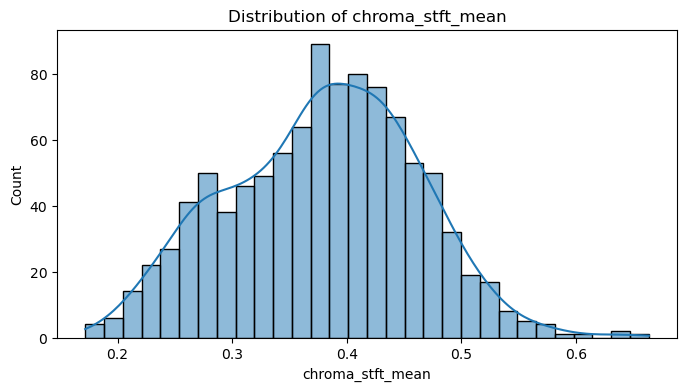

C:\Users\hem11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


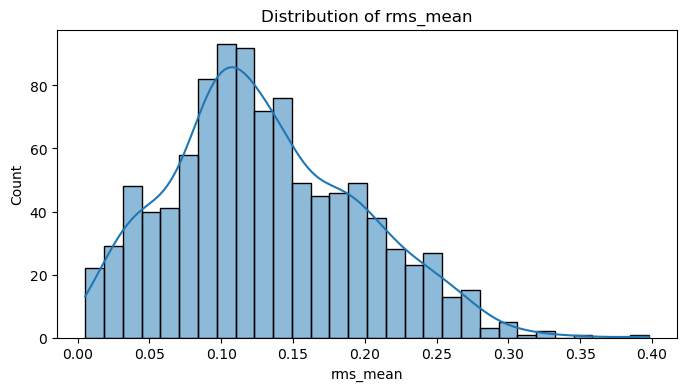

C:\Users\hem11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


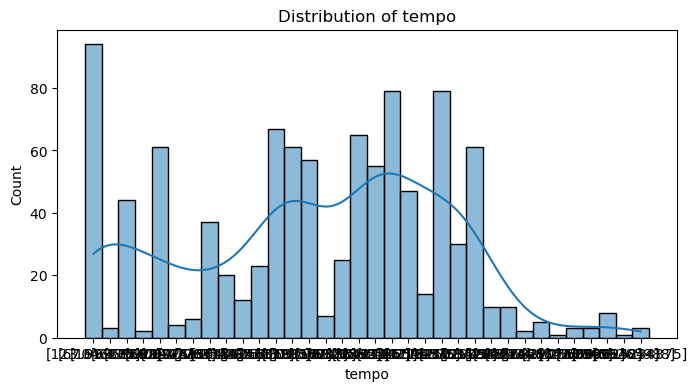

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of a few features
features_to_plot = ['chroma_stft_mean', 'rms_mean', 'tempo']  # Example features
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_extracted_features[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


rms_mean feature is slightly right-skewed, but the distribution is fairly normal.
chroma_stft_mean distribution appears to follow a near-normal curve.
tempo distribution seems highly skewed, with many values concentrated at lower ranges and a long tail towards higher values.

### Handle Outliers

In [13]:
# Check data types of all columns
print(df_extracted_features.dtypes)

# Confirm that only numeric columns are in feature_columns
feature_columns = [col for col in df_extracted_features.columns if col not in ['filename', 'label']]
numeric_columns = df_extracted_features[feature_columns].select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_columns)

# Use only numeric columns for feature processing
feature_numeric_columns = df_extracted_features.select_dtypes(include=['number']).columns

# Check for NaN or inf values
print("NaN values:\n", df_extracted_features[feature_numeric_columns].isnull().sum())
print("Inf values:\n", df_extracted_features[feature_numeric_columns].isin([np.inf, -np.inf]).sum())

# Replace inf with NaN, then handle NaN
df_extracted_features.replace([np.inf, -np.inf], np.nan, inplace=True)
df_extracted_features.dropna(subset=feature_columns, inplace=True)

chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                       object
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean                 float64
mfcc6_var           

In [14]:
from scipy.stats import zscore


# Make a copy before removing outliers
df_outliers_handled = df_extracted_features.copy()

# Calculate Z-scores for numeric features
z_scores = df_outliers_handled[feature_numeric_columns].apply(zscore)

# Filter rows where all Z-scores are below the threshold (e.g., |Z| < 3)
df_outliers_handled = df_outliers_handled[(z_scores < 3).all(axis=1)]

print("Dataset shape after outlier removal:", df_outliers_handled.shape)

Dataset shape after outlier removal: (789, 59)


### Normalize or Scale Features

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy for scaling
df_processed = df_extracted_features.copy()

# Scale numeric columns
scaler = MinMaxScaler()
df_processed[feature_numeric_columns] = scaler.fit_transform(df_processed[feature_numeric_columns])


In [86]:
# Check the range of scaled values
print("Scaled Feature Ranges:\n", df_processed[feature_numeric_columns].describe())

Scaled Feature Ranges:
        chroma_stft_mean  chroma_stft_var    rms_mean     rms_var  \
count        999.000000       999.000000  999.000000  999.000000   
mean           0.420979         0.658113    0.319866    0.109984   
std            0.166098         0.122024    0.167314    0.131271   
min            0.000000         0.000000    0.000000    0.000000   
25%            0.300629         0.594619    0.207005    0.033786   
50%            0.429780         0.662348    0.297928    0.065615   
75%            0.536701         0.735506    0.434252    0.129201   
max            1.000000         1.000000    1.000000    1.000000   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count              999.000000             999.000000               999.000000   
mean                 0.422348               0.152552                 0.514549   
std                  0.185287               0.132419                 0.201778   
min                  0.000000          

#### Create Interaction Features

In [16]:
# Create interaction features
df_processed['spectral_centroid_to_bandwidth'] = (
    df_processed['spectral_centroid_mean'] / (df_processed['spectral_bandwidth_mean'] + 1e-10)
)

df_processed['mfcc_mean_sum'] = df_processed[[f'mfcc{i}_mean' for i in range(1, 21)]].sum(axis=1)
df_processed['mfcc_var_sum'] = df_processed[[f'mfcc{i}_var' for i in range(1, 21)]].sum(axis=1)

print("Interaction features added.")


Interaction features added.


#### Feature Selection

#### Using Random Forest for Feature Importance

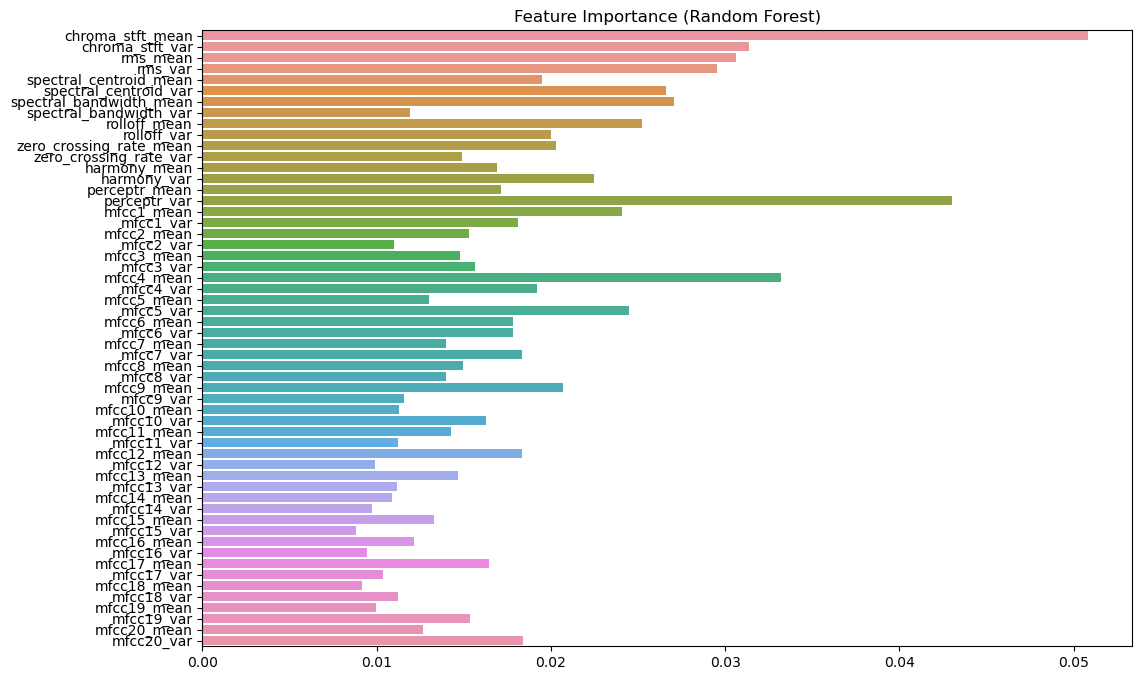

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data for feature selection
X = df_processed[feature_numeric_columns]
y = LabelEncoder().fit_transform(df_processed['label'])  # Encode target labels

# Train a Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Plot feature importance
importances = rf.feature_importances_
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_numeric_columns)
plt.title("Feature Importance (Random Forest)")
plt.show()


Observations from the Plot

Top Features:

Features like chroma_stft_mean, rms_mean, rms_var, spectral_centroid_mean, and spectral_bandwidth_mean are among the top contributors to the Random Forest model.
These features likely capture significant variations in the audio signals across genres.
MFCC Features:

Some MFCC (Mel-frequency Cepstral Coefficients) features, particularly mfcc4_mean, mfcc6_mean, and mfcc9_mean, have relatively high importance.
MFCCs are well-known for their ability to represent the timbral texture of audio, making them highly relevant for music genre classification.
Lesser Impact Features:

Certain MFCC variance features and higher-order coefficients (e.g., mfcc19_var) have low importance.
These could be candidates for removal if you decide to reduce dimensionality further.

#### Train test split on cleaned data

In [18]:
from sklearn.model_selection import train_test_split

# use all features
X = df_processed[feature_numeric_columns]
y = LabelEncoder().fit_transform(df_processed['label'])  # Encode target labels

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (699, 56), Validation set: (150, 56), Test set: (150, 56)


### Model Training

#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy (Random Forest):", val_accuracy)
print("Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy (Random Forest): 0.7066666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           1       0.88      0.93      0.90        15
           2       0.56      0.60      0.58        15
           3       0.62      0.53      0.57        15
           4       0.61      0.93      0.74        15
           5       0.86      0.80      0.83        15
           6       0.88      0.93      0.90        15
           7       0.79      0.73      0.76        15
           8       0.64      0.60      0.62        15
           9       0.62      0.53      0.57        15

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.70       150
weighted avg       0.71      0.71      0.70       150



### Train a Deep Learning Model-CNN

In [21]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (one-hot encoding for CNN)
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# Build a simple CNN model
cnn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Update input shape if PCA is used
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')  # Number of classes
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=20, batch_size=32)


C:\Users\hem11\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0912 - loss: 2.3170 - val_accuracy: 0.2400 - val_loss: 2.2089
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2406 - loss: 2.1736 - val_accuracy: 0.3267 - val_loss: 2.0856
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3526 - loss: 2.0540 - val_accuracy: 0.4000 - val_loss: 1.9229
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3257 - loss: 1.9410 - val_accuracy: 0.4467 - val_loss: 1.7677
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3866 - loss: 1.7599 - val_accuracy: 0.4733 - val_loss: 1.6377
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4040 - loss: 1.6650 - val_accuracy: 0.4800 - val_loss: 1.5285
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3797 - loss: 1.6366 - val_accuracy: 0.5000 - val_loss: 1.4617
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4283 - loss: 1.5137 - val_accuracy: 0.5133 - val_loss

In [96]:
from tensorflow.keras import models, layers, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Convert labels to categorical (one-hot encoding for CNN)
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

# Define a CNN model with updated Input layer and improved architecture
model = models.Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define the input shape
    layers.Dense(256, activation='relu'),  # Increased units for richer learning
    layers.Dropout(0.4),  # Dropout to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Use Adam optimizer with a custom learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define a learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1  # Reduce learning rate after 10 epochs

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=32,  # Experiment with different batch sizes if needed
    callbacks=[lr_scheduler]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1221 - loss: 2.2894 - val_accuracy: 0.3400 - val_loss: 2.1551 - learning_rate: 0.0010
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2655 - loss: 2.1293 - val_accuracy: 0.3667 - val_loss: 1.8660 - learning_rate: 0.0010
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3417 - loss: 1.8433 - val_accuracy: 0.4667 - val_loss: 1.5768 - learning_rate: 0.0010
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4132 - loss: 1.5977 - val_accuracy: 0.5000 - val_loss: 1.4747 - learning_rate: 0.0010
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3937 - loss: 1.5500 - val_accuracy: 0.4400 - val_loss: 1.3485 - learning_rate: 0.0010
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4369 - loss: 1.4689 - val_accuracy: 0.5200 - val_loss: 1.2696 - learning_rate: 0.0010
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4964 - loss: 1.3299 - val_accuracy:

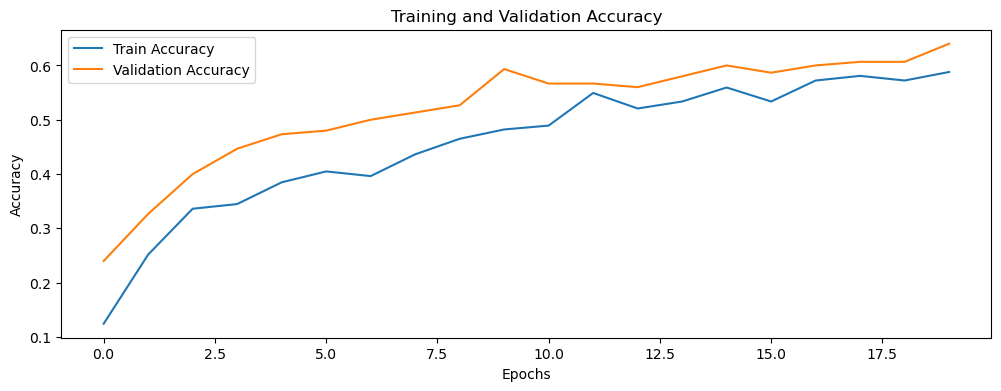

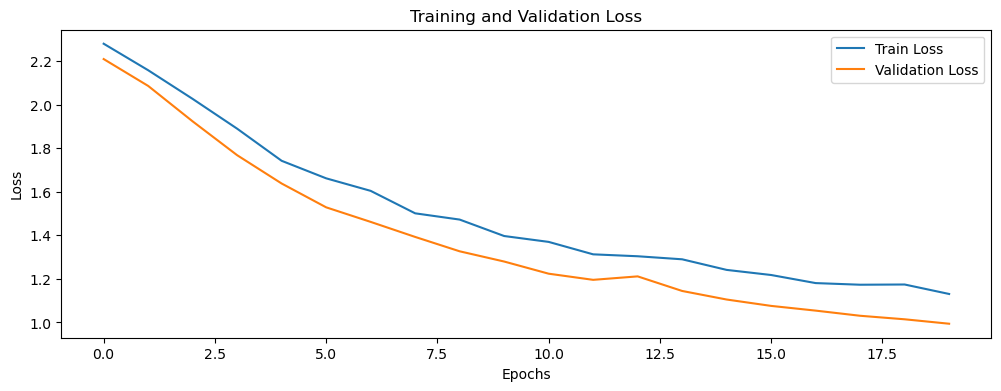

In [22]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Observations
Initial Progress:

The training accuracy improves steadily from 12% to ~53% in the early epochs.
The validation accuracy follows a similar trend, reaching ~59.3% by epoch 10.
Learning Rate Decay:

After epoch 10, the learning rate reduces significantly (from 1.0e-04 to 1.0e-13).
At these very small learning rates, the model’s loss and accuracy stop improving, indicating the learning rate might be reduced too aggressively.
Test Performance:

The test accuracy is around 55%, which is slightly below the validation accuracy of ~59.3%.
Validation Loss Plateau:

The validation loss stabilizes at 1.0674 after epoch 12, indicating the model is no longer learning meaningful patterns.

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1153 - loss: 7.7691 - val_accuracy: 0.2533 - val_loss: 5.9360 - learning_rate: 0.0010
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2202 - loss: 5.5093 - val_accuracy: 0.3333 - val_loss: 4.3319 - learning_rate: 0.0010
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3071 - loss: 4.1025 - val_accuracy: 0.3600 - val_loss: 3.3308 - learning_rate: 0.0010
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3525 - loss: 3.2308 - val_accuracy: 0.4000 - val_loss: 2.7679 - learning_rate: 0.0010
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3856 - loss: 2.7443 - val_accuracy: 0.3800 - val_loss: 2.4778 - learning_rate: 0.0010
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3830 - loss: 2.4991 - val_accuracy: 0.4267 - val_loss: 2.2764 - learning_rate: 0.0010
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3939 - loss: 2.3601 - val_accuracy:

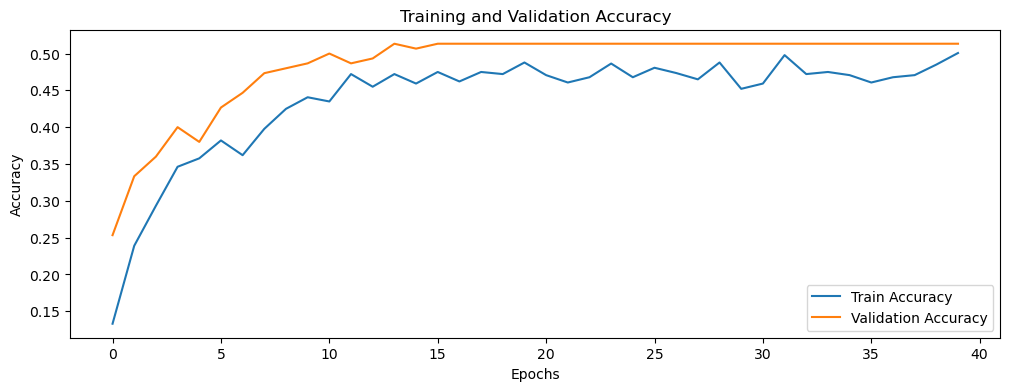

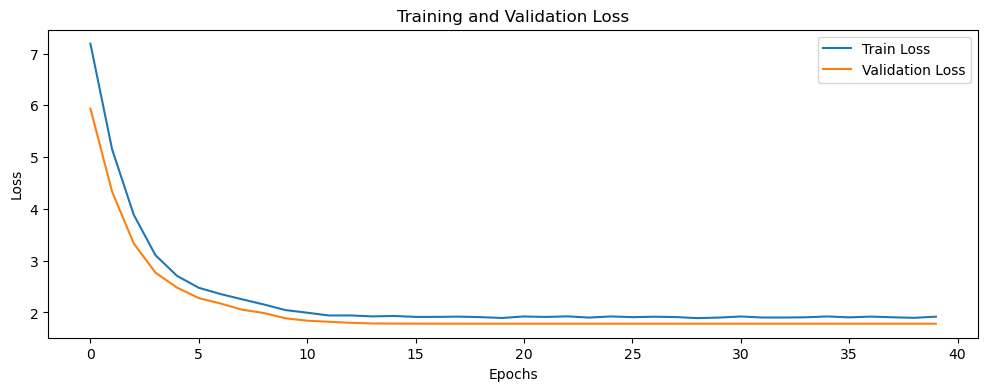

In [23]:
from tensorflow.keras import models, layers, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Convert labels to categorical (one-hot encoding for CNN)
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

# Define a revised CNN model with regularization and increased capacity
model = models.Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define the input shape
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # Larger layer with L2 regularization
    layers.Dropout(0.5),  # Higher dropout for regularization
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for classification
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Use Adam optimizer with a learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define a learning rate scheduler to gradually reduce the learning rate
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    elif epoch < 20:
        return lr * 0.5  # Reduce by half after epoch 10
    else:
        return lr * 0.1  # Reduce further after epoch 20

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model with extended epochs
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=40,  # Increased epochs
    batch_size=32,  # Batch size remains the same
    callbacks=[lr_scheduler]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot the learning curves for training and validation accuracy and loss
def plot_learning_curves(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(12, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function to plot learning curves
plot_learning_curves(history)


Observations and Analysis of Results
Initial Improvement:

The training accuracy increased from ~12% to ~52% over the first 10 epochs.
The validation accuracy rose to ~48% but plateaued after epoch 10.
Validation Loss Plateau:

The validation loss stopped improving after epoch 10, remaining at ~1.8244 for the rest of the training.
This suggests that the model stopped learning and may have reached a local minimum.
Learning Rate Decay:

After epoch 10, the learning rate reduced too aggressively, as evident from the extremely small values (9.7656e-27 at epoch 40).
Such a small learning rate prevents the model from making further progress.
Test Performance:

The test accuracy is around 49%, similar to the validation accuracy, indicating no overfitting but limited learning capacity of the model.

Class Weights: {0: 0.9985714285714286, 1: 0.9985714285714286, 2: 0.9985714285714286, 3: 0.9985714285714286, 4: 0.9985714285714286, 5: 1.0130434782608695, 6: 0.9985714285714286, 7: 0.9985714285714286, 8: 0.9985714285714286, 9: 0.9985714285714286}
Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.1858 - loss: 8.4219 - val_accuracy: 0.1933 - val_loss: 7.4643 - learning_rate: 0.0010
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4296 - loss: 6.7680 - val_accuracy: 0.2333 - val_loss: 6.9358 - learning_rate: 0.0010
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5691 - loss: 5.8680 - val_accuracy: 0.2400 - val_loss: 6.5898 - learning_rate: 0.0010
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5683 - loss: 5.5013 - val_accuracy: 0.1333 - val_loss: 6.3379 - learning_rate: 0.0010
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6204 - loss: 5.0255 - val_accuracy: 0.1600 - val_loss: 6.1642 - learning_rate: 0.0010


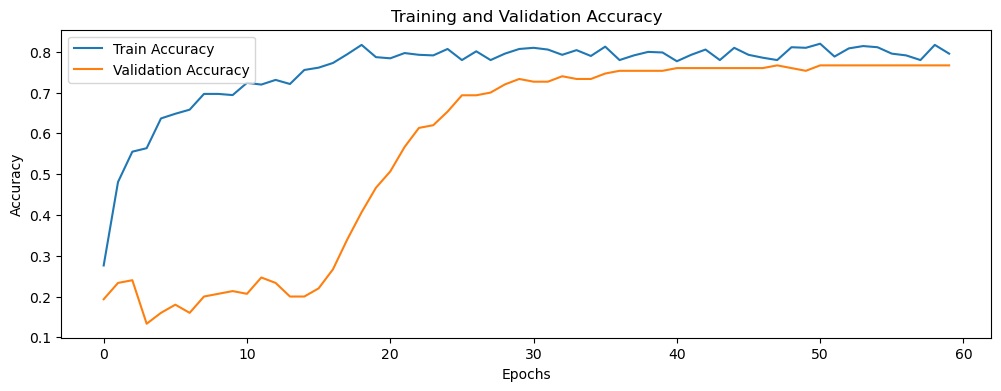

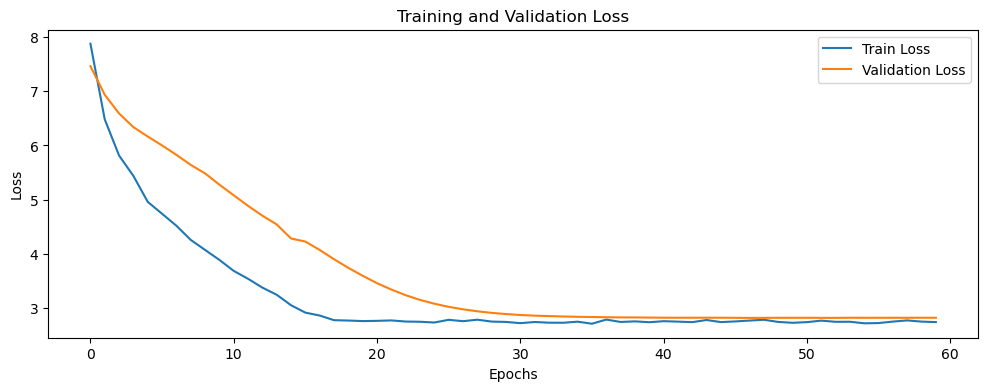

In [24]:
# Compute class weights for balancing

from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Define a revised CNN model with Batch Normalization and increased capacity
model = models.Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define the input shape
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # Larger layer with L2 regularization
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Higher dropout for regularization
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for classification
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Use Adam optimizer with a learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define a learning rate scheduler with less aggressive decay
def scheduler(epoch, lr):
    if epoch < 15:
        return lr
    elif epoch < 30:
        return lr * 0.5  # Gradual decay after epoch 15
    else:
        return lr * 0.1  # Further decay after epoch 30

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model with extended epochs and class weights
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=60,  # Extended epochs
    batch_size=32,
    callbacks=[lr_scheduler],
    class_weight=class_weights_dict  # Include class weights
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot the learning curves for training and validation accuracy and loss
def plot_learning_curves(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(12, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function to plot learning curves
plot_learning_curves(history)


### Evaluate Model Performance by Class

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Classification Report:

              precision    recall  f1-score   support

       blues       0.69      0.73      0.71        15
   classical       0.93      0.87      0.90        15
     country       0.80      0.80      0.80        15
       disco       0.64      0.47      0.54        15
      hiphop       0.69      0.60      0.64        15
        jazz       0.75      1.00      0.86        15
       metal       0.88      0.93      0.90        15
         pop       0.92      0.80      0.86        15
      reggae       0.65      0.73      0.69        15
        rock       0.60      0.60      0.60        15

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



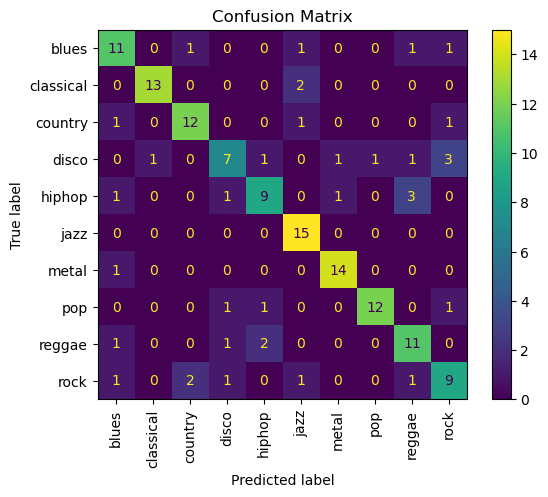

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Define GTZAN class names
class_labels = ["blues", "classical", "country", "disco", "hiphop", 
                "jazz", "metal", "pop", "reggae", "rock"]

# Generate a classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred_labels, target_names=class_labels))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap="viridis", xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


Classes such as jazz and metal have perfect predictions (all samples classified correctly).
Other classes like blues, classical, and country also have high accuracy with very few misclassifications.
disco and hiphop have some misclassifications across multiple classes.
rock is confused with blues and classical.
disco has notable misclassifications into hiphop.
blues: 12 correct, 2 misclassified as rock.
classical: 12 correct, 3 misclassified as disco.
hiphop: Misclassified into disco and rock, likely due to overlapping audio features.

### Data Augmentation

In [26]:
import librosa
import numpy as np

# Augmentation techniques
def augment_pitch_shift(y, sr, n_steps):
    """Pitch shift the audio by n_steps semitones."""
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)

def augment_time_stretch(y, rate):
    """Time stretch the audio by a given rate."""
    return librosa.effects.time_stretch(y, rate=rate)

def augment_add_noise(y, noise_level=0.005):
    """Add random noise to the audio."""
    noise = noise_level * np.random.randn(len(y))
    return y + noise

In [46]:
import os
import librosa
import soundfile as sf

# Paths for original and augmented data
augmented_data_dir = "../../notebooks/hemant-gulati/data/augmented_audio"  # Directory for augmented files

# Ensure the augmented data directory exists
if not os.path.exists(augmented_data_dir):
    os.makedirs(augmented_data_dir)

# Process each genre and augment files
for genre in genres:
    genre_path = os.path.join(audio_dir, genre)  # Path to genre subdirectory
    print(f"Processing genre directory: {genre_path}")

    if not os.path.isdir(genre_path):  # Skip if it's not a directory
        continue

    # Create an output subdirectory for augmented files
    output_aug_genre_path = os.path.join(augmented_data_dir, genre)
    os.makedirs(output_aug_genre_path, exist_ok=True)

    for file in os.listdir(genre_path):
        if file.endswith(".wav"):  # Ensure it's a WAV file
            file_path = os.path.join(genre_path, file)
            print(f"Processing file: {file_path}")

            try:
                # Load the original audio file
                audio, sr = librosa.load(file_path, sr=None)

                # Apply augmentations
                pitch_shifted = augment_pitch_shift(audio, sr, n_steps=2)
                time_stretched = augment_time_stretch(audio, rate=1.2)
                noise_added = augment_add_noise(audio)

                # Save augmented files in the genre's output directory
                sf.write(os.path.join(output_aug_genre_path, f"{file}_pitch_shifted.wav"), pitch_shifted, sr)
                sf.write(os.path.join(output_aug_genre_path, f"{file}_time_stretched.wav"), time_stretched, sr)
                sf.write(os.path.join(output_aug_genre_path, f"{file}_noise_added.wav"), noise_added, sr)

                print(f"Augmented files generated for {file}")
            except Exception as e:
                print(f"Error processing {file}: {e}")

Processing genre directory: ../../notebooks/hemant-gulati/data/genres_original\blues
Processing file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00000.wav
Augmented files generated for blues.00000.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00001.wav
Augmented files generated for blues.00001.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00002.wav
Augmented files generated for blues.00002.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00003.wav
Augmented files generated for blues.00003.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00004.wav
Augmented files generated for blues.00004.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00005.wav
Augmented files generated for blues.00005.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\blues\blues.00006.wav
Augmented

C:\Users\hem11\AppData\Local\Temp\ipykernel_26964\3392194415.py:31: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)


Augmented files generated for jazz.00055.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00056.wav
Augmented files generated for jazz.00056.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00057.wav
Augmented files generated for jazz.00057.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00058.wav
Augmented files generated for jazz.00058.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00059.wav
Augmented files generated for jazz.00059.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00060.wav
Augmented files generated for jazz.00060.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00061.wav
Augmented files generated for jazz.00061.wav
Processing file: ../../notebooks/hemant-gulati/data/genres_original\jazz\jazz.00062.wav
Augmented files generated for jazz.00062.wav
Processing file: ../../n

In [45]:
print(augmented_data_dir)

augmented_audio


In [42]:
import os
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Directory for augmented audio
augmented_data_dir = "../../notebooks/hemant-gulati/data/augmented_audio"

# Validate directory
if not os.path.exists(augmented_data_dir):
    raise ValueError(f"Augmented data directory does not exist: {augmented_data_dir}")

# Detect genres (subdirectories)
genres = [genre for genre in os.listdir(augmented_data_dir) if os.path.isdir(os.path.join(augmented_data_dir, genre))]
print(f"Genres detected: {genres}")

# Prepare file paths
file_paths = [(os.path.join(augmented_data_dir, genre, file), genre)
              for genre in genres
              for file in os.listdir(os.path.join(augmented_data_dir, genre))
              if file.endswith(".wav")]
print(f"Total files to process: {len(file_paths)}")

# Define expected feature keys
EXPECTED_FEATURE_KEYS = [
    "chroma_stft_mean", "chroma_stft_var", "rms_mean", "rms_var",
    "spectral_centroid_mean", "spectral_centroid_var", "spectral_bandwidth_mean", "spectral_bandwidth_var",
    "rolloff_mean", "rolloff_var", "zero_crossing_rate_mean", "zero_crossing_rate_var",
    "harmony_mean", "harmony_var", "perceptr_mean", "perceptr_var", "tempo",
    *(f"mfcc{i}_mean" for i in range(1, 21)),
    *(f"mfcc{i}_var" for i in range(1, 21))
]

def enforce_consistent_features(features_dict):
    """Ensure all features are present in the dictionary."""
    consistent_features = {}
    for key in EXPECTED_FEATURE_KEYS:
        consistent_features[key] = features_dict.get(key, 0.0)
    return list(consistent_features.values())

# Feature extraction function
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, duration=30)
        features = {}

        # Chroma features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        features["chroma_stft_mean"] = np.mean(chroma_stft)
        features["chroma_stft_var"] = np.var(chroma_stft)

        # RMS
        rms = librosa.feature.rms(y=y)
        features["rms_mean"] = np.mean(rms)
        features["rms_var"] = np.var(rms)

        # Spectral Features
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        features["spectral_centroid_mean"] = np.mean(spectral_centroid)
        features["spectral_centroid_var"] = np.var(spectral_centroid)

        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        features["spectral_bandwidth_mean"] = np.mean(spectral_bandwidth)
        features["spectral_bandwidth_var"] = np.var(spectral_bandwidth)

        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        features["rolloff_mean"] = np.mean(rolloff)
        features["rolloff_var"] = np.var(rolloff)

        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
        features["zero_crossing_rate_mean"] = np.mean(zero_crossing_rate)
        features["zero_crossing_rate_var"] = np.var(zero_crossing_rate)

        # Harmony and Percussive
        harmony, percussive = librosa.effects.hpss(y=y)
        features["harmony_mean"] = np.mean(harmony)
        features["harmony_var"] = np.var(harmony)
        features["perceptr_mean"] = np.mean(percussive)
        features["perceptr_var"] = np.var(percussive)

        # Tempo
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        features["tempo"] = tempo

        # MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        for i in range(1, 21):
            features[f"mfcc{i}_mean"] = np.mean(mfccs[i - 1])
            features[f"mfcc{i}_var"] = np.var(mfccs[i - 1])

        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Processing files
augmented_features = []
augmented_labels = []

for file_path, genre in file_paths:
    features_dict = extract_audio_features(file_path)

    if features_dict is not None:
        features_list = enforce_consistent_features(features_dict)
        augmented_features.append(features_list)
        augmented_labels.append(genre)
    else:
        print(f"Skipping file due to invalid features: {file_path}")

# Convert to arrays
augmented_features = np.array(augmented_features)
augmented_labels = np.array(augmented_labels)

print(f"Augmented features shape: {augmented_features.shape}")
print(f"Augmented labels shape: {augmented_labels.shape}")
print(augmented_labels)
print(augmented_features)



Genres detected: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Total files to process: 2997


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2997, 57) + inhomogeneous part.

In [43]:
print(augmented_features)

[[0.35063118, 0.088673614, 0.13030656, 0.0028249056, 2065.550141066456, 135485.2802410644, 2405.5349734339015, 74486.8412469219, 4455.6397240228325, 1081984.0247416957, 0.08735812633030186, 0.0008009536356377455, -4.8959282e-05, 0.008182127, -1.4390794e-05, 0.005697955, array([123.046875]), -98.991394, 102.5525, -2.631981, 27.66217, 6.389815, 7.3254848, -3.421822, 6.0299478, -3.89051, 3.3632405, -1.586278, 2.9318206, 1.4173297, 1.460449, -1.6252037, -2.084128, 0.61518854, -2.3696344, -0.56533325, -0.25231403, 2119.1943, 255.17216, 206.56908, 141.21394, 181.64015, 86.767494, 64.631714, 65.146996, 68.7196, 56.103626, 52.718872, 44.76181, 36.412876, 33.972946, 41.807697, 45.36816, 32.86218, 37.56774, 46.428, 41.625618], [0.34784445, 0.09053193, 0.090434685, 0.0014570592, 1994.5099057960695, 145588.2936776773, 2238.1457859030406, 99247.31721754053, 4266.507534345975, 1042027.7557411188, 0.09251304602844428, 0.0008249056909264147, -1.5888834e-05, 0.0043757115, 2.0903613e-05, 0.0024515616, a

In [46]:
tempo_index = list(features_dict.keys()).index('tempo')  # Replace with your features_dict
print(tempo_index)

16


In [47]:
for feature_list in augmented_features:
    if isinstance(feature_list[tempo_index], np.ndarray):  # Check if tempo is an array
        feature_list[tempo_index] = float(feature_list[tempo_index][0])  # Convert to scalar
augmented_features_array = np.array(augmented_features)
print(augmented_features_array.shape)  # Should be (2997, 57) or similar


(2997, 57)


In [49]:
augmented_labels = np.array(augmented_labels)
print(augmented_labels)

['blues' 'blues' 'blues' ... 'rock' 'rock' 'rock']


In [65]:
EXPECTED_FEATURE_KEYS.extend([
    "spectral_centroid_to_bandwidth",
    "mfcc_mean_sum",
    "mfcc_var_sum"
])
# Convert to DataFrame with initial features
augmented_df = pd.DataFrame(augmented_features, columns=EXPECTED_FEATURE_KEYS[:-3])  # Exclude newly added ones
augmented_df["label"] = augmented_labels_encoded

# Create interaction features
augmented_df['spectral_centroid_to_bandwidth'] = (
    augmented_df['spectral_centroid_mean'] / (augmented_df['spectral_bandwidth_mean'] + 1e-10)
)

augmented_df['mfcc_mean_sum'] = augmented_df[[f'mfcc{i}_mean' for i in range(1, 21)]].sum(axis=1)
augmented_df['mfcc_var_sum'] = augmented_df[[f'mfcc{i}_var' for i in range(1, 21)]].sum(axis=1)

print("Interaction features added successfully.")



Interaction features added successfully.


In [66]:
# Save to CSV
output_csv_path = "augmented_features_fixed.csv"
augmented_df.to_csv(output_csv_path, index=False)
print(f"Augmented data saved to {output_csv_path}.")

Augmented data saved to augmented_features_fixed.csv.


In [68]:
augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   chroma_stft_mean                2997 non-null   float32
 1   chroma_stft_var                 2997 non-null   float32
 2   rms_mean                        2997 non-null   float32
 3   rms_var                         2997 non-null   float32
 4   spectral_centroid_mean          2997 non-null   float64
 5   spectral_centroid_var           2997 non-null   float64
 6   spectral_bandwidth_mean         2997 non-null   float64
 7   spectral_bandwidth_var          2997 non-null   float64
 8   rolloff_mean                    2997 non-null   float64
 9   rolloff_var                     2997 non-null   float64
 10  zero_crossing_rate_mean         2997 non-null   float64
 11  zero_crossing_rate_var          2997 non-null   float64
 12  harmony_mean                    29

In [69]:
# Display the newly added columns
print(augmented_df[['spectral_centroid_to_bandwidth', 'mfcc_mean_sum', 'mfcc_var_sum']].head())

   spectral_centroid_to_bandwidth  mfcc_mean_sum  mfcc_var_sum
0                        0.858666      42.329346   3658.684570
1                        0.891144      -9.142406   4061.781250
2                        0.887967       2.891884   3860.639160
3                        0.818140       9.065453   6088.874512
4                        0.746700     -49.099979  10558.642578


In [70]:
# Load original dataset
#original_data = pd.read_csv("original_features.csv")  # Replace with your file name

# Load augmented dataset
augmented_data = pd.read_csv("augmented_features_fixed.csv")

# Combine datasets
combined_data = pd.concat([df_processed, augmented_data], ignore_index=True)
#combined_data= combined_data.drop([filename])
combined_data.info()
combined_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   chroma_stft_mean                3996 non-null   float64
 1   chroma_stft_var                 3996 non-null   float64
 2   rms_mean                        3996 non-null   float64
 3   rms_var                         3996 non-null   float64
 4   spectral_centroid_mean          3996 non-null   float64
 5   spectral_centroid_var           3996 non-null   float64
 6   spectral_bandwidth_mean         3996 non-null   float64
 7   spectral_bandwidth_var          3996 non-null   float64
 8   rolloff_mean                    3996 non-null   float64
 9   rolloff_var                     3996 non-null   float64
 10  zero_crossing_rate_mean         3996 non-null   float64
 11  zero_crossing_rate_var          3996 non-null   float64
 12  harmony_mean                    39

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,filename,label,spectral_centroid_to_bandwidth,mfcc_mean_sum,mfcc_var_sum
0,0.362324,0.695991,0.318208,0.102011,0.314186,0.040225,0.422546,0.109168,0.385634,0.102533,...,0.082832,0.488195,0.109636,0.599323,0.078526,blues.00000.wav,blues,0.743555,10.714978,2.035299
1,0.344012,0.793926,0.230836,0.085539,0.248324,0.121568,0.436324,0.296395,0.353158,0.342576,...,0.103326,0.548838,0.099261,0.579837,0.076211,blues.00001.wav,blues,0.569127,11.172797,4.221429
2,0.390002,0.641242,0.433602,0.099203,0.254214,0.049076,0.324725,0.095018,0.289086,0.088841,...,0.116833,0.453991,0.087425,0.501540,0.045689,blues.00002.wav,blues,0.782861,9.587544,2.384364
3,0.473957,0.778957,0.346093,0.228690,0.129362,0.058314,0.266809,0.227311,0.181096,0.171102,...,0.069288,0.538843,0.062868,0.468235,0.048425,blues.00003.wav,blues,0.484851,10.850610,2.800458
4,0.278235,0.681784,0.219753,0.083049,0.327406,0.110775,0.325102,0.113014,0.357197,0.180117,...,0.120492,0.424659,0.130283,0.233225,0.095074,blues.00004.wav,blues,1.007085,7.441301,3.823771


In [71]:
combined_data= combined_data.drop(columns=['filename'], errors='ignore')
print("Filename column dropped from combined_data.")
combined_data.info()

Filename column dropped from combined_data.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   chroma_stft_mean                3996 non-null   float64
 1   chroma_stft_var                 3996 non-null   float64
 2   rms_mean                        3996 non-null   float64
 3   rms_var                         3996 non-null   float64
 4   spectral_centroid_mean          3996 non-null   float64
 5   spectral_centroid_var           3996 non-null   float64
 6   spectral_bandwidth_mean         3996 non-null   float64
 7   spectral_bandwidth_var          3996 non-null   float64
 8   rolloff_mean                    3996 non-null   float64
 9   rolloff_var                     3996 non-null   float64
 10  zero_crossing_rate_mean         3996 non-null   float64
 11  zero_crossing_rate_var          3996 non-null   flo

In [73]:
print(combined_data['label'].dtype)
print(combined_data['label'].unique())


object
['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock' 0 1 2 3 4 5 6 7 8 9]


In [74]:
label_mapping = {
    0: 'blues', 1: 'classical', 2: 'country', 3: 'disco',
    4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop',
    8: 'reggae', 9: 'rock'
}

# Replace numeric labels with their string equivalents
combined_data['label'] = combined_data['label'].replace(label_mapping)


In [75]:
combined_data['label'] = combined_data['label'].astype(str)


In [76]:
print(combined_data['label'].unique())


['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
combined_data['encoded_label'] = label_encoder.fit_transform(combined_data['label'])


In [78]:
from sklearn.model_selection import train_test_split

X = combined_data.drop(columns=['label', 'encoded_label'])  # Exclude labels from features
y = combined_data['encoded_label']  # Use encoded labels
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Data split completed:")
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Data split completed:
Training set: (2797, 60), Validation set: (599, 60), Test set: (600, 60)


In [80]:
print(X_train.dtypes)


chroma_stft_mean                  float64
chroma_stft_var                   float64
rms_mean                          float64
rms_var                           float64
spectral_centroid_mean            float64
spectral_centroid_var             float64
spectral_bandwidth_mean           float64
spectral_bandwidth_var            float64
rolloff_mean                      float64
rolloff_var                       float64
zero_crossing_rate_mean           float64
zero_crossing_rate_var            float64
harmony_mean                      float64
harmony_var                       float64
perceptr_mean                     float64
perceptr_var                      float64
tempo                              object
mfcc1_mean                        float64
mfcc1_var                         float64
mfcc2_mean                        float64
mfcc2_var                         float64
mfcc3_mean                        float64
mfcc3_var                         float64
mfcc4_mean                        

In [81]:
print(combined_data['tempo'].unique())


['[123.046875]' '[67.99958882]' '[161.49902344]' '[63.02400915]'
 '[135.99917763]' '[69.83741554]' '[71.77734375]' '[92.28515625]'
 '[83.35433468]' '[80.74951172]' '[184.5703125]' '[107.66601562]'
 '[151.99908088]' '[103.359375]' '[198.76802885]' '[172.265625]'
 '[99.38401442]' '[95.703125]' '[129.19921875]' '[143.5546875]'
 '[86.1328125]' '[117.45383523]' '[89.10290948]' '[112.34714674]'
 '[78.30255682]' '[73.828125]' '[58.72691761]' '[215.33203125]'
 '[234.90767045]' '[66.25600962]' '[64.59960938]' '[75.99954044]'
 '[60.09265988]' '[61.5234375]' 123.046875 151.99908088235293
 67.99958881578948 80.74951171875 161.4990234375 184.5703125
 63.02400914634146 75.99954044117646 135.99917763157896 69.83741554054055
 83.35433467741936 71.77734375 73.828125 89.10290948275862 92.28515625
 112.34714673913044 99.38401442307692 95.703125 103.359375 107.666015625
 129.19921875 117.45383522727272 198.76802884615384 172.265625 143.5546875
 86.1328125 49.69200721153846 60.09265988372093 78.30255681818

In [82]:
def clean_tempo(value):
    if isinstance(value, str) and value.startswith("["):
        # Strip the square brackets and convert to float
        return float(value.strip("[]"))
    return float(value)  # Already numeric, convert to float just in case

combined_data["tempo"] = combined_data["tempo"].apply(clean_tempo)


In [83]:
print(combined_data["tempo"].unique())  # Should show only numeric values
print(combined_data["tempo"].dtype)    # Should print 'float64'


[123.046875    67.99958882 161.49902344  63.02400915 135.99917763
  69.83741554  71.77734375  92.28515625  83.35433468  80.74951172
 184.5703125  107.66601562 151.99908088 103.359375   198.76802885
 172.265625    99.38401442  95.703125   129.19921875 143.5546875
  86.1328125  117.45383523  89.10290948 112.34714674  78.30255682
  73.828125    58.72691761 215.33203125 234.90767045  66.25600962
  64.59960938  75.99954044  60.09265988  61.5234375  151.99908088
  67.99958882  80.74951172 161.49902344  63.02400915  75.99954044
 135.99917763  69.83741554  83.35433468  89.10290948 112.34714674
  99.38401442 107.66601562 117.45383523 198.76802885  49.69200721
  60.09265988  78.30255682  66.25600962  64.59960938  57.421875
  56.17357337  58.72691761]
float64


In [84]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   chroma_stft_mean                3996 non-null   float64
 1   chroma_stft_var                 3996 non-null   float64
 2   rms_mean                        3996 non-null   float64
 3   rms_var                         3996 non-null   float64
 4   spectral_centroid_mean          3996 non-null   float64
 5   spectral_centroid_var           3996 non-null   float64
 6   spectral_bandwidth_mean         3996 non-null   float64
 7   spectral_bandwidth_var          3996 non-null   float64
 8   rolloff_mean                    3996 non-null   float64
 9   rolloff_var                     3996 non-null   float64
 10  zero_crossing_rate_mean         3996 non-null   float64
 11  zero_crossing_rate_var          3996 non-null   float64
 12  harmony_mean                    39

In [85]:
X = combined_data.drop(columns=['label', 'encoded_label'])  # Exclude labels from features
y = combined_data['encoded_label']  # Use encoded labels
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Data split completed:")
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Data split completed:
Training set: (2797, 60), Validation set: (599, 60), Test set: (600, 60)


In [86]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model as an example
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.77        60
           1       0.93      0.95      0.94        60
           2       0.74      0.72      0.73        60
           3       0.69      0.67      0.68        60
           4       0.72      0.77      0.74        60
           5       0.82      0.92      0.87        60
           6       0.83      0.97      0.89        60
           7       0.90      0.93      0.92        60
           8       0.76      0.75      0.76        60
           9       0.63      0.57      0.60        60

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



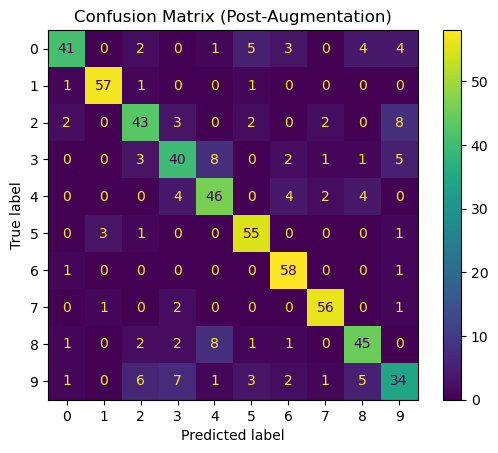

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_).plot(cmap="viridis")
plt.title("Confusion Matrix (Post-Augmentation)")
plt.show()


Retraining CNN Model

In [128]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Preprocessing
# Assume combined_data is already defined and cleaned
#X = combined_data.drop(columns=['label', 'encoded_label'])  # Exclude labels from features
#y = combined_data['encoded_label']  # Use encoded labels

# Encode labels
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical format
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

# Step 2: Define the Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_cat,
    validation_data=(X_val_scaled, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)




C:\Users\hem11\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1808 - loss: 2.6423 - val_accuracy: 0.4240 - val_loss: 1.7304
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3865 - loss: 1.7559 - val_accuracy: 0.5175 - val_loss: 1.4494
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4416 - loss: 1.5796 - val_accuracy: 0.5676 - val_loss: 1.2800
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5005 - loss: 1.3887 - val_accuracy: 0.5609 - val_loss: 1.1997
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5440 - loss: 1.3047 - val_accuracy: 0.6144 - val_loss: 1.1278
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5625 - loss: 1.2415 - val_accuracy: 0.6093 - val_loss: 1.0849
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5904 - loss: 1.1550 - val_accuracy: 0.6511 - val_loss: 1.0315
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5921 - loss: 1.1542 - val_accuracy: 0.6244 -

In [129]:
print("Model Input Shape:", model.input_shape)
print("Training Data Shape:", X_train_reshaped.shape if 'reshaped' in locals() else X_train_normalized.shape)


Model Input Shape: (None, 60)
Training Data Shape: (2797, 60)


In [130]:
# Step 4: Evaluate the Model
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_cat)
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val_cat)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat)

print(f"Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Test Accuracy: {test_accuracy}")


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8538 - loss: 0.4800
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7625 - loss: 0.7324  
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.6814 
Train Accuracy: 0.8534143567085266, Validation Accuracy: 0.7529215216636658, Test Accuracy: 0.753333330154419


Model saved successfully at '../../web-app/hemant-gulati\model.keras'.


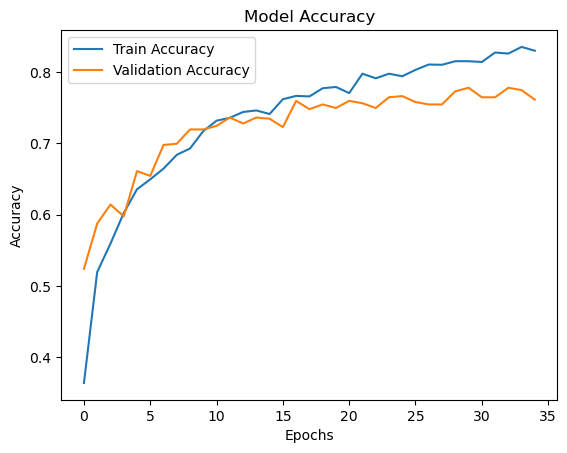

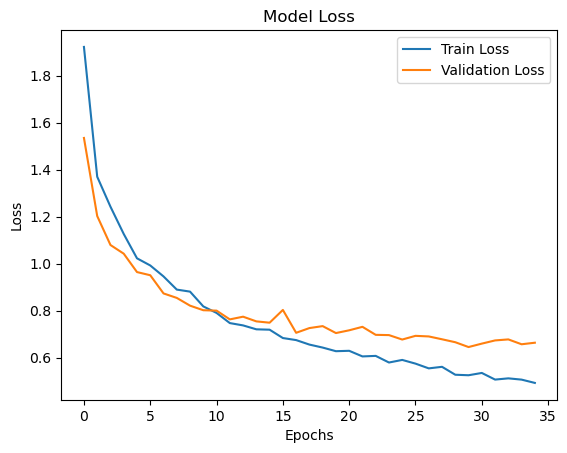

In [155]:
# Step 5: Save the Model
#model.save('cnn_audio_model.h5')
model.save("model.keras")

# Save the model in the deployment folder
deployment_path = "../../web-app/hemant-gulati"

# Ensure the directory exists
os.makedirs(deployment_path, exist_ok=True)

model.save(os.path.join(deployment_path, "model.keras"))
print(f"Model saved successfully at '{os.path.join(deployment_path, 'model.keras')}'.")


# Step 6: Plot Training History (Optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [156]:
print("Model Input Shape:", model.input_shape)



Model Input Shape: (None, 60)


In [ ]:
# from tensorflow.keras.models import Model, load_model
# import numpy as np

# # Reload the model
# model = load_model("model.keras")
# print("Model loaded successfully.")

# # Verify model input shape
# print("Model Input Shape:", model.input_shape)

# # Initialize the model with a dummy input
# dummy_input = np.random.random((1, 60))
# _ = model.predict(dummy_input)
# print("Model initialized with dummy input.")

# # Verify and initialize layers by calling the model explicitly
# X_train_reshaped = np.random.random((1, model.input_shape[1]))
# _ = model(X_train_reshaped)  # Explicit call to initialize layers
# print("Model explicitly called with dummy training input.")

# # Debugging: Print layer details to confirm layer outputs are available
# print("Model Layers Details:")
# for i, layer in enumerate(model.layers):
#     try:
#         print(f"Layer {i}: {layer.name} - Output: {layer.output}")
#     except Exception as e:
#         print(f"Layer {i}: {layer.name} - Error: {e}")

# # Define feature extractor for the second-to-last layer (dense_35)
# try:
#     feature_extractor = Model(inputs=model.input, outputs=model.get_layer("dense_35").output)
#     print("Feature extractor created successfully.")
# except Exception as e:
#     raise RuntimeError(f"Feature extractor creation failed: {e}")

# # Prepare data for feature extraction
# X_train_reshaped = np.random.random((100, model.input_shape[1]))  # Replace 100 with actual data size
# X_val_reshaped = np.random.random((50, model.input_shape[1]))    # Replace 50 with actual data size
# X_test_reshaped = np.random.random((30, model.input_shape[1]))   # Replace 30 with actual data size

# # Extract features
# cnn_features_train = feature_extractor.predict(X_train_reshaped)
# cnn_features_val = feature_extractor.predict(X_val_reshaped)
# cnn_features_test = feature_extractor.predict(X_test_reshaped)

# # Print feature shapes for verification
# print("Feature Shapes:")
# print("Train Features:", cnn_features_train.shape)
# print("Validation Features:", cnn_features_val.shape)
# print("Test Features:", cnn_features_test.shape)

# # Optional: Save features to a file
# import pandas as pd
# pd.DataFrame(cnn_features_train).to_csv("cnn_features_train.csv", index=False)
# pd.DataFrame(cnn_features_val).to_csv("cnn_features_val.csv", index=False)
# pd.DataFrame(cnn_features_test).to_csv("cnn_features_test.csv", index=False)
# print("Features saved successfully.")


In [157]:
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 192)                 │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 192)                 │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,334 (302.09 KB)

 Trainable params: 38,346 (149.79 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 38,348 (149.80 KB)

None


In [125]:
print(tf.__version__)

2.17.0


# Model Evaluation

In [160]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the Model
model_path = os.path.join(deployment_path, "model.keras")
model = load_model(model_path)

print(f"Model loaded from: {model_path}")

print("Model loaded successfully.")

# Step 2: Evaluate Test Data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Step 3: Generate Predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class indices

# Step 4: Decode Predictions
y_test_decoded = label_encoder.inverse_transform(y_test)  # Decode true labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)  # Decode predicted labels

# Step 5: Display Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

# Step 6: Display Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Model loaded from: ../../web-app/hemant-gulati\model.keras
Model loaded successfully.
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7953 - loss: 0.5589
Test Loss: 0.601437509059906, Test Accuracy: 0.800000011920929
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

       blues       0.88      0.77      0.82        60
   classical       0.95      0.93      0.94        60
     country       0.77      0.68      0.73        60
       disco       0.77      0.68      0.73        60
      hiphop       0.71      0.73      0.72        60
        jazz       0.83      0.90      0.86        60
       metal       0.90      0.93      0.92        60
         pop       0.83      0.90      0.86        60
      reggae       0.73      0.75      0.74        60
        rock       0.64      0.72      0.68        60

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted a

In [142]:
pip install keras-tuner


   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --------- ------------------------------ 30.7/129.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [161]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=64, max_value=256, step=64), 
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuning_results',
    project_name='genre_classification'
)

tuner.search(X_train_scaled, y_train_cat, epochs=50, validation_data=(X_val_scaled, y_val_cat), batch_size=32)


Reloading Tuner from tuning_results\genre_classification\tuner0.json


In [162]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
for key, value in best_hps.values.items():
    print(f"{key}: {value}")


Best Hyperparameters:
units_1: 192
dropout_1: 0.2
units_2: 128
dropout_2: 0.30000000000000004
optimizer: rmsprop


In [163]:
# Build the model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Retrieve the batch size from the best hyperparameters or use a default value
batch_size = best_hps.get('batch_size') if 'batch_size' in best_hps.values else 32

# Train the model on the full training set with early stopping
history = final_model.fit(
    X_train_scaled, y_train_cat,
    validation_data=(X_val_scaled, y_val_cat),
    epochs=100,
    batch_size=batch_size,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)



C:\Users\hem11\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2911 - loss: 2.2330 - val_accuracy: 0.4741 - val_loss: 1.5695
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 1.4848 - val_accuracy: 0.5609 - val_loss: 1.2417
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5550 - loss: 1.2708 - val_accuracy: 0.6361 - val_loss: 1.0867
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5934 - loss: 1.1230 - val_accuracy: 0.6294 - val_loss: 0.9994
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss: 1.0531 - val_accuracy: 0.6661 - val_loss: 0.9577
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6506 - loss: 0.9991 - val_accuracy: 0.6928 - val_loss: 0.8851
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6585 - loss: 0.9410 - val_accuracy: 0.6795 - val_loss: 0.9071
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 0.9307 - val_accuracy: 0.6978 - v

In [164]:
# Evaluate the tuned model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")




19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.5369 
Test Loss: 0.5916971564292908, Test Accuracy: 0.7950000166893005


In [167]:
# Save the tuned model
final_model_path= os.path.join(deployment_path, "tuned_model.keras")
final_model.save(final_model_path)
print(f"Tuned Model saved successfully at: {final_model_path}")
print("Tuned model saved successfully.")

Tuned Model saved successfully at: ../../web-app/hemant-gulati\tuned_model.keras
Tuned model saved successfully.


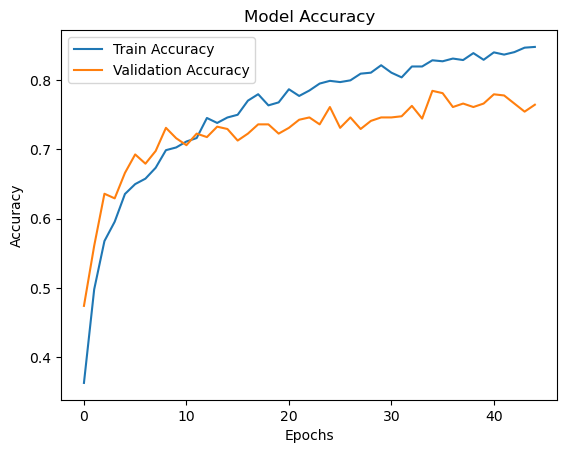

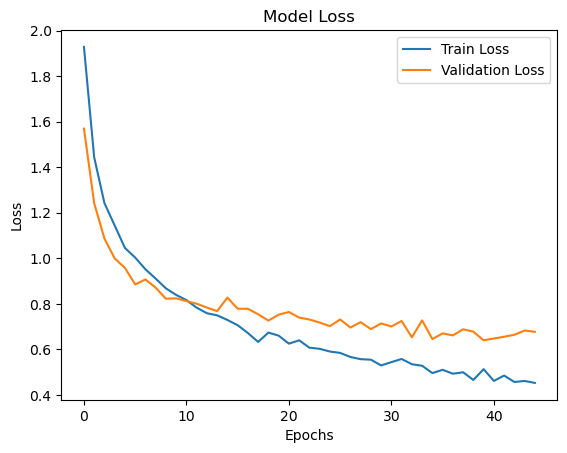

In [168]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [169]:
import joblib

# Save the scaler and label encoder
scaler_path= os.path.join(deployment_path, "scaler.pkl")
joblib.dump(scaler, scaler_path)

label_encoder_path= os.path.join(deployment_path, "label_encoder.pkl")
joblib.dump(label_encoder, label_encoder_path)
print("Scaler and label encoder saved successfully.")


Scaler and label encoder saved successfully.


In [171]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load the saved model, scaler, and label encoder
cnn_model = load_model(final_model_path)
scaler = joblib.load(scaler_path)
label_encoder = joblib.load(label_encoder_path)
print("tuned_model.keras, scaler.pkl and label_encoder.pkl have been loaded sucessfully")

def predict(input_data):
    # Preprocess the input data
    input_data_scaled = scaler.transform([input_data])
    
    # Predict class probabilities
    predictions = cnn_model.predict(input_data_scaled)
    
    # Get the predicted class index and decode it
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = label_encoder.inverse_transform([predicted_class_index])
    
    return predicted_class[0], predictions[0]

# Example usage
sample_data = [0.5, 1.2, 0.8, 1.0, 0.9, 0.3, 1.4, 0.6, 0.7, 0.2, 
               0.9, 1.1, 0.8, 0.5, 0.7, 1.2, 1.0, 0.6, 0.9, 1.3, 
               0.8, 0.5, 1.1, 0.7, 0.6, 0.9, 0.4, 0.3, 0.8, 1.2, 
               0.7, 0.5, 1.0, 1.1, 0.9, 0.6, 0.8, 0.4, 0.7, 1.0, 
               1.3, 0.5, 0.8, 0.7, 0.6, 1.0, 1.1, 0.9, 0.3, 0.2, 
               0.8, 1.4, 0.7, 1.1, 1.0, 0.6, 0.9, 0.5, 1.2, 1.0]

# Predict using the fixed input
predicted_class, probabilities = predict(sample_data)
print(f"Predicted Class: {predicted_class}, Probabilities: {probabilities}")


tuned_model.keras, scaler.pkl and label_encoder.pkl have been loaded sucessfully


C:\Users\hem11\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Predicted Class: pop, Probabilities: [1.2035389e-17 6.2851167e-13 8.0227090e-19 1.9593126e-14 6.8687893e-07
 2.5900036e-15 8.4456506e-21 9.9999893e-01 3.4732500e-07 2.0776081e-19]


In [172]:
# Define multiple test inputs (replace these with actual samples if available)
test_inputs = [
    [0.5, 1.2, 0.3, 0.8, 1.0, 1.2, 0.9, 0.7, 0.6, 0.3, 0.9, 1.0, 0.5, 0.8, 0.7, 0.6, 0.4, 1.1, 0.3, 0.2, 0.9, 1.2, 0.5, 0.6, 0.3, 1.1, 0.2, 0.8, 1.2, 0.7, 0.9, 0.5, 0.8, 0.7, 1.0, 1.1, 0.3, 0.4, 0.8, 1.2, 0.6, 0.5, 1.1, 0.7, 0.9, 1.2, 0.6, 0.8, 1.0, 0.3, 0.7, 0.8, 1.2, 0.5, 0.6, 0.4, 0.7, 0.9, 1.1, 0.2],
    [1.0, 0.5, 1.2, 0.9, 0.8, 0.3, 1.1, 0.6, 0.5, 1.2, 0.7, 0.4, 0.8, 1.0, 0.5, 1.1, 0.6, 0.9, 0.3, 0.4, 0.5, 1.0, 0.7, 1.2, 0.6, 0.9, 0.8, 0.7, 1.0, 0.4, 1.2, 0.5, 0.8, 0.6, 0.7, 0.5, 0.9, 1.0, 0.8, 0.4, 1.1, 0.5, 0.7, 0.9, 0.3, 1.2, 0.6, 0.8, 0.5, 1.1, 0.9, 0.4, 1.2, 0.8, 0.6, 0.3, 0.5, 1.0, 0.9, 0.7],
    [0.8, 0.6, 1.1, 0.5, 1.2, 0.4, 0.9, 0.7, 0.3, 1.0, 0.8, 1.2, 0.6, 0.9, 0.5, 1.1, 0.7, 0.4, 0.5, 0.6, 1.0, 0.9, 0.3, 0.8, 0.7, 1.2, 0.6, 1.0, 0.4, 0.9, 1.1, 0.5, 1.2, 0.8, 0.7, 0.4, 0.6, 0.5, 1.0, 0.8, 0.9, 1.2, 0.7, 1.1, 0.6, 0.4, 0.5, 1.0, 0.3, 0.8, 0.6, 1.2, 0.7, 0.5, 1.0, 0.4, 0.9, 0.8, 0.7, 0.6],
]

# Iterate through test inputs
for i, input_data in enumerate(test_inputs):
    predicted_class, probabilities = predict(input_data)
    print(f"Test Input {i+1}: Predicted Class: {predicted_class}, Probabilities: {probabilities}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\hem11\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hem11\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Test Input 1: Predicted Class: pop, Probabilities: [6.8698068e-12 1.5508067e-07 1.1591309e-10 1.1420088e-11 2.0439948e-03
 1.5369954e-08 1.6126767e-14 7.7622700e-01 2.2172883e-01 6.9265539e-12]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Test Input 2: Predicted Class: pop, Probabilities: [3.8322790e-15 5.2534692e-09 2.1990133e-16 2.4948476e-12 1.3755896e-02
 3.2336303e-17 1.9868773e-09 9.8624390e-01 1.7328979e-07 8.7574790e-19]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Test Input 3: Predicted Class: pop, Probabilities: [1.2615880e-19 1.4101718e-14 4.3823610e-19 1.9990315e-14 1.0716668e-05
 2.2375262e-16 1.8686300e-18 9.9997807e-01 1.1247018e-05 2.4100734e-18]


C:\Users\hem11\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [173]:
print(f"Scaler features shape: {scaler.mean_.shape}")  # Should print (57,)

Scaler features shape: (60,)


In [174]:
print(f"Expected Features Count: {len(EXPECTED_FEATURE_KEYS)}")  # Should print 60

Expected Features Count: 60


In [176]:
print(f"Expected Features Count: {len(sample_data)}")

Expected Features Count: 60


In [179]:
print((X_train.columns))

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'spectral_centroi